In [2]:
import pandas as pd
import re
from urllib.parse import urlparse

In [9]:
df1 = pd.read_csv('./data/urls in webpage/affiliate-urls-with-redirection-33substr.csv')
df2 = pd.read_csv('./data/urls in webpage/affiliate-urls-with-redirection-125substr.csv')

In [10]:
df1

,url,final_page,redirect_1,redirect_2,redirect_3
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
1,https://kqzyfj.com/click-100728870-14328925,NaN,NaN,NaN,NaN
2,https://ad.admitad.com/goto/6f54b960458366992c...,NaN,NaN,NaN,NaN
3,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...,NaN,NaN,NaN
4,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...,NaN,NaN,NaN
...,...,...,...,...,...
13573,http://www.pntra.com/t/Qj5HQUVHPkhDRUhGPkdBRUc...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
13574,http://sigma-beauty.7eer.net/c/196942,http://sigma-beauty.7eer.net/c/196942,NaN,NaN,NaN
13575,https://ticketmaster.evyy.net/c/252938/271177/...,https://www.ticketmaster.ca/the-mavericks-mont...,https://www.ticketmaster.ca/the-mavericks-mont...,NaN,NaN
13576,http://pntra.com/t/2-203842-101099-60860?sid=5...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN


In [12]:
df1 = df1[~df1['final_page'].isna()]
df1

,url,final_page,redirect_1,redirect_2,redirect_3
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
3,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...,NaN,NaN,NaN
4,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...,NaN,NaN,NaN
5,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...,https://www.skinstore.com/?AID=4198925&PID=172...,NaN,NaN
6,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
...,...,...,...,...,...
13573,http://www.pntra.com/t/Qj5HQUVHPkhDRUhGPkdBRUc...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
13574,http://sigma-beauty.7eer.net/c/196942,http://sigma-beauty.7eer.net/c/196942,NaN,NaN,NaN
13575,https://ticketmaster.evyy.net/c/252938/271177/...,https://www.ticketmaster.ca/the-mavericks-mont...,https://www.ticketmaster.ca/the-mavericks-mont...,NaN,NaN
13576,http://pntra.com/t/2-203842-101099-60860?sid=5...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN


In [13]:
df1.reset_index(drop=True, inplace=True)
df1

,url,final_page,redirect_1,redirect_2,redirect_3
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...,NaN,NaN,NaN
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...,NaN,NaN,NaN
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...,https://www.skinstore.com/?AID=4198925&PID=172...,NaN,NaN
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
...,...,...,...,...,...
10486,http://www.pntra.com/t/Qj5HQUVHPkhDRUhGPkdBRUc...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN
10487,http://sigma-beauty.7eer.net/c/196942,http://sigma-beauty.7eer.net/c/196942,NaN,NaN,NaN
10488,https://ticketmaster.evyy.net/c/252938/271177/...,https://www.ticketmaster.ca/the-mavericks-mont...,https://www.ticketmaster.ca/the-mavericks-mont...,NaN,NaN
10489,http://pntra.com/t/2-203842-101099-60860?sid=5...,http://pepperjamnetwork.com/tracking/error.php,http://pepperjamnetwork.com/tracking/error.php,NaN,NaN


In [5]:
df2

,url,redirect_1,final_page,redirect_2,redirect_3,redirect_4
0,https://rstyle.me/+AgJy1vHgb3IpgHads8xVoQBlue,https://www.shopltk.com/?redirect_type=code_11...,https://www.shopltk.com/?redirect_type=code_11...,NaN,NaN,NaN
1,https://alitems.co/g/uq1eoj16ck24f51d248db6d17...,https://promotion.aliexpress.ru/wow/gcp/aer/da...,https://promotion.aliexpress.ru/wow/gcp/aer/da...,NaN,NaN,NaN
2,https://www.epidemicsound.com/referral/b2zv......,https://www.epidemicsound.com/referral/b2zv......,https://www.epidemicsound.com/referral/b2zv......,NaN,NaN,NaN
3,https://alitems.com/g/9vijc7ptzdf7a004b94d7a66...,NaN,NaN,NaN,NaN,NaN
4,http://rstyle.me/n/968td9sx6,https://rstyle.me/n/968td9sx6,https://rstyle.me/n/968td9sx6,NaN,NaN,NaN
...,...,...,...,...,...,...
16122,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html,https://shrsl.com/linkerror.html,NaN,NaN,NaN
16123,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...,https://www.shopstyle.com/action/apiVisitRetai...,NaN,NaN,NaN
16124,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,NaN,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,NaN,NaN,NaN
16125,https://adorama.rfvk.net/x9dREx,https://www.adorama.com/fplcffv200.html?EmailP...,https://www.adorama.com/fplcffv200.html?EmailP...,NaN,NaN,NaN


In [14]:
df2 = df2[~df2['final_page'].isna()]
df2

,url,redirect_1,final_page,redirect_2,redirect_3,redirect_4
0,https://rstyle.me/+AgJy1vHgb3IpgHads8xVoQBlue,https://www.shopltk.com/?redirect_type=code_11...,https://www.shopltk.com/?redirect_type=code_11...,NaN,NaN,NaN
1,https://alitems.co/g/uq1eoj16ck24f51d248db6d17...,https://promotion.aliexpress.ru/wow/gcp/aer/da...,https://promotion.aliexpress.ru/wow/gcp/aer/da...,NaN,NaN,NaN
2,https://www.epidemicsound.com/referral/b2zv......,https://www.epidemicsound.com/referral/b2zv......,https://www.epidemicsound.com/referral/b2zv......,NaN,NaN,NaN
4,http://rstyle.me/n/968td9sx6,https://rstyle.me/n/968td9sx6,https://rstyle.me/n/968td9sx6,NaN,NaN,NaN
5,https://www.epidemicsound.com/referral/b6u5p1/,https://www.epidemicsound.com/campaign/invite-...,https://www.epidemicsound.com/campaign/invite-...,NaN,NaN,NaN
...,...,...,...,...,...,...
16121,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5,https://backit.me/ru/cashback?inviter=baikz5,NaN,NaN,NaN
16122,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html,https://shrsl.com/linkerror.html,NaN,NaN,NaN
16123,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...,https://www.shopstyle.com/action/apiVisitRetai...,NaN,NaN,NaN
16124,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,NaN,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,NaN,NaN,NaN


In [15]:
df2.reset_index(drop=True, inplace=True)
df2

,url,redirect_1,final_page,redirect_2,redirect_3,redirect_4
0,https://rstyle.me/+AgJy1vHgb3IpgHads8xVoQBlue,https://www.shopltk.com/?redirect_type=code_11...,https://www.shopltk.com/?redirect_type=code_11...,NaN,NaN,NaN
1,https://alitems.co/g/uq1eoj16ck24f51d248db6d17...,https://promotion.aliexpress.ru/wow/gcp/aer/da...,https://promotion.aliexpress.ru/wow/gcp/aer/da...,NaN,NaN,NaN
2,https://www.epidemicsound.com/referral/b2zv......,https://www.epidemicsound.com/referral/b2zv......,https://www.epidemicsound.com/referral/b2zv......,NaN,NaN,NaN
3,http://rstyle.me/n/968td9sx6,https://rstyle.me/n/968td9sx6,https://rstyle.me/n/968td9sx6,NaN,NaN,NaN
4,https://www.epidemicsound.com/referral/b6u5p1/,https://www.epidemicsound.com/campaign/invite-...,https://www.epidemicsound.com/campaign/invite-...,NaN,NaN,NaN
...,...,...,...,...,...,...
15150,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5,https://backit.me/ru/cashback?inviter=baikz5,NaN,NaN,NaN
15151,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html,https://shrsl.com/linkerror.html,NaN,NaN,NaN
15152,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...,https://www.shopstyle.com/action/apiVisitRetai...,NaN,NaN,NaN
15153,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,NaN,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,NaN,NaN,NaN


In [16]:
df = pd.concat([df1[['url', 'final_page']], df2[['url', 'final_page']]])
df

,url,final_page
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php
...,...,...
15150,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5
15151,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html
15152,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...
15153,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw


In [17]:
df.reset_index(drop=True, inplace=True)
df

,url,final_page
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php
...,...,...
25641,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5
25642,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html
25643,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...
25644,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw


In [19]:
df = df.drop_duplicates()

In [20]:
df

,url,final_page
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php
...,...,...
25641,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5
25642,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html
25643,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...
25644,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw


In [21]:
df.reset_index(drop=True, inplace=True)
df

,url,final_page
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php
...,...,...
25494,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5
25495,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html
25496,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...
25497,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw


In [22]:
df.to_csv('./data/urls in webpage/affiliate-urls-with-final-all.csv', index = False)

In [23]:
df['url_length'] = df['url'].apply(lambda x: len(x))
df['final_page_length'] = df['final_page'].apply(lambda x: len(x))

e:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
e:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df

,url,final_page,url_length,final_page_length
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php,67,46
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...,121,121
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...,58,58
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...,44,134
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php,37,46
...,...,...,...,...
25494,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5,41,44
25495,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html,23,32
25496,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...,26,133
25497,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,41,41


In [39]:
def count_para(url):
    # 解析URL
    parsed_url = urlparse(url)

    # # 获取URL的各个部分
    # scheme = parsed_url.scheme
    # netloc = parsed_url.netloc
    # path = parsed_url.path

    # 获取URL的参数信息
    query = parsed_url.query
    params = re.split(r"[\?&]+", query)
    # words += [x.split('=')[0] for x in params if x]
    # for param in params:
    #     if param.split("=")[0] == "partnerid":
    #         print(param)
    try:
        params.remove('')
    except:
        pass
    # print(params)
    return len(params) if params else 0

In [40]:
print(count_para(df.at[0, 'final_page']))

0


In [41]:
from tqdm import tqdm

invalid_indexs = []

for i in tqdm(range(len(df))):
    try:
        df.at[i, 'url_para_cnt'] = count_para(df.loc[i, 'url'])
        df.at[i, 'final_page_para_cnt'] = count_para(df.loc[i, 'final_page'])

    except:
        invalid_indexs.append(i)

  0%|          | 0/25499 [00:00<?, ?it/s]

100%|██████████| 25499/25499 [00:01<00:00, 16835.46it/s]


In [42]:
invalid_indexs

[]

In [43]:
df

,url,final_page,url_length,final_page_length,url_para_cnt,final_page_para_cnt
0,http://pntrs.com/t/2-218304-101099-60860?sid=1...,http://pepperjamnetwork.com/tracking/error.php,67,46,2.0,0.0
1,https://sigmabeauty.7eer.net/c/240752/146780/2...,https://sigmabeauty.7eer.net/c/240752/146780/2...,121,121,1.0,1.0
2,http://ad.admitad.com/goto/552fefea60f6273f46f...,http://ad.admitad.com/goto/552fefea60f6273f46f...,58,58,0.0,0.0
3,http://www.dpbolvw.net/click-1721680-4198925,https://www.skinstore.com/?AID=4198925&PID=172...,44,134,0.0,6.0
4,http://www.pntra.com/t/TUJGR0VMSEJGTk,http://pepperjamnetwork.com/tracking/error.php,37,46,0.0,0.0
...,...,...,...,...,...,...
25494,http://epngo.bz/cashback_joinusnow/baikz5,https://backit.me/ru/cashback?inviter=baikz5,41,44,0.0,1.0
25495,https://shrsl.com/zyrm-,https://shrsl.com/linkerror.html,23,32,0.0,0.0
25496,http://shopstyle.it/l/piOE,https://www.shopstyle.com/action/apiVisitRetai...,26,133,0.0,3.0
25497,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,https://rstyle.me/+HNPckVclgR2ZOQalNIngFw,41,41,0.0,0.0


In [44]:
df.to_csv('./data/urls in webpage/affiliate-urls-with-final-all.csv', index = False)

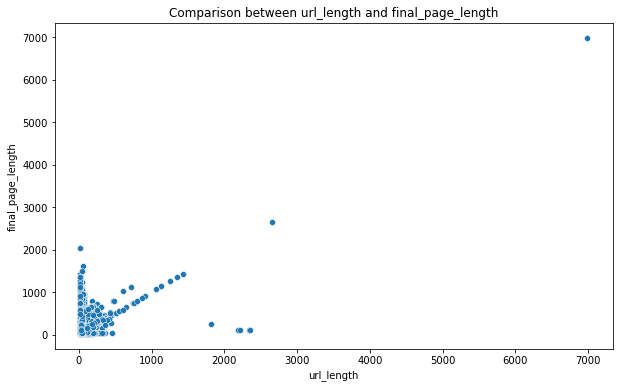

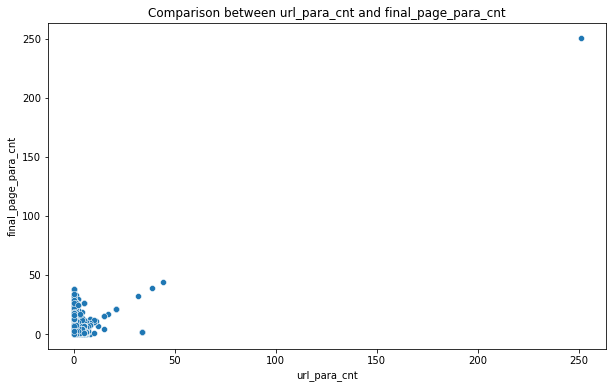

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_length和final_page_length之间的散点图
sns.scatterplot(data=df, x='url_length', y='final_page_length')
plt.title('Comparison between url_length and final_page_length')
plt.show()

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_para_cnt和final_page_para_cnt之间的散点图
sns.scatterplot(data=df, x='url_para_cnt', y='final_page_para_cnt')
plt.title('Comparison between url_para_cnt and final_page_para_cnt')
plt.show()


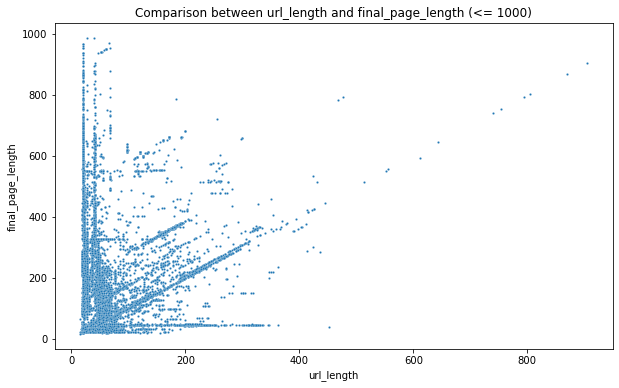

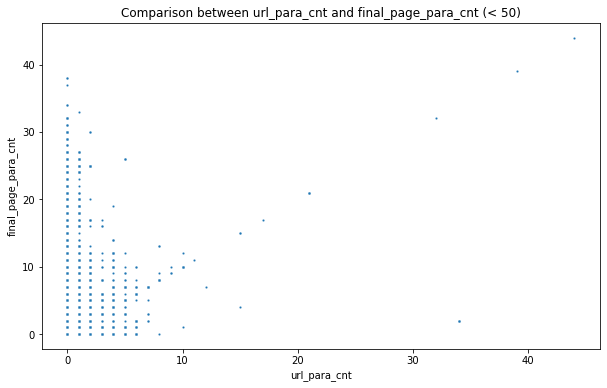

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选出url_length和final_page_length小于等于1000的数据
filtered_data1 = df[(df['url_length'] <= 1000) & (df['final_page_length'] <= 1000)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_length和final_page_length之间的散点图
sns.scatterplot(data=filtered_data1, x='url_length', y='final_page_length', s = 5)
plt.title('Comparison between url_length and final_page_length (<= 1000)')
plt.show()

# 筛选出url_para_cnt和final_page_para_cnt小于50的数据
filtered_data2 = df[(df['url_para_cnt'] < 50) & (df['final_page_para_cnt'] < 50)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_para_cnt和final_page_para_cnt之间的散点图
sns.scatterplot(data=filtered_data2, x='url_para_cnt', y='final_page_para_cnt', s = 5)
plt.title('Comparison between url_para_cnt and final_page_para_cnt (< 50)')
plt.show()


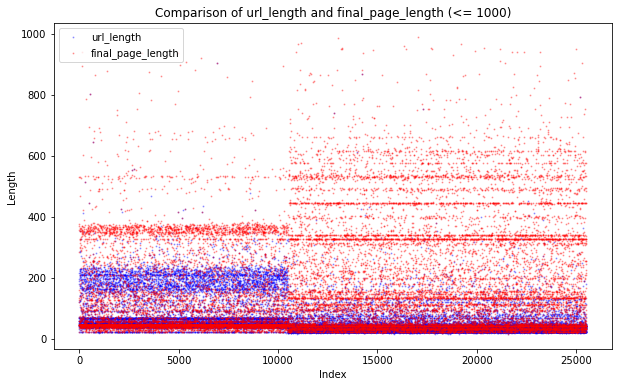

In [54]:
import matplotlib.pyplot as plt

# 筛选出url_length和final_page_length小于等于1000的数据
filtered_data = df[(df['url_length'] <= 1000) & (df['final_page_length'] <= 1000)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_length的散点图（蓝色）
plt.scatter(filtered_data.index, filtered_data['url_length'], color='blue', label='url_length', alpha=0.3, s=1)

# 绘制final_page_length的散点图（红色）
plt.scatter(filtered_data.index, filtered_data['final_page_length'], color='red', label='final_page_length', alpha=0.3, s=1)

# 设置标题和轴标签
plt.title('Comparison of url_length and final_page_length (<= 1000)')
plt.xlabel('Index')
plt.ylabel('Length')

# 添加图例
plt.legend()

# 显示图表
plt.show()


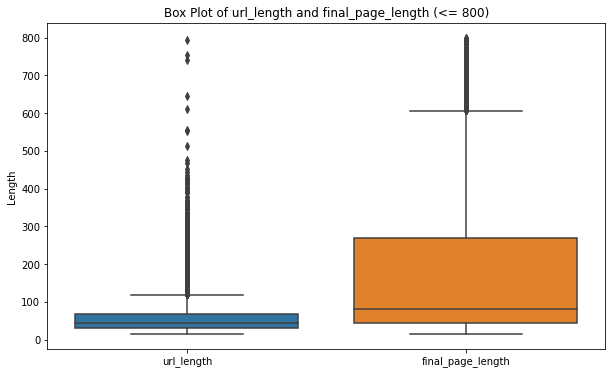

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选出url_length和final_page_length小于等于1000的数据
filtered_data = df[(df['url_length'] <= 800) & (df['final_page_length'] <= 800)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_length和final_page_length的盒图
sns.boxplot(data=filtered_data[['url_length', 'final_page_length']])

# 设置标题和轴标签
plt.title('Box Plot of url_length and final_page_length (<= 800)')
plt.ylabel('Length')

# 显示图表
plt.show()


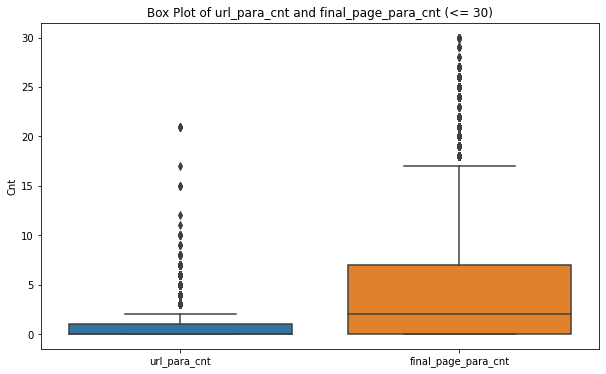

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = df[(df['url_para_cnt'] <= 30) & (df['final_page_para_cnt'] <= 30)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

sns.boxplot(data=filtered_data[['url_para_cnt', 'final_page_para_cnt']])

# 设置标题和轴标签
plt.title('Box Plot of url_para_cnt and final_page_para_cnt (<= 30)')
plt.ylabel('Cnt')

# 显示图表
plt.show()


url_length            68.783669
final_page_length    163.749389
dtype: float64


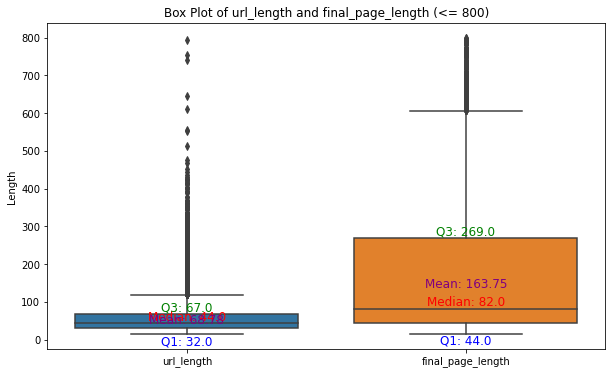

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选出url_length和final_page_length小于等于1000的数据
filtered_data = df[(df['url_length'] <= 800) & (df['final_page_length'] <= 800)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_length和final_page_length的盒图
sns.boxplot(data=filtered_data[['url_length', 'final_page_length']])

# 计算中位数、上下四分位数和平均值
medians = filtered_data[['url_length', 'final_page_length']].median()
q1 = filtered_data[['url_length', 'final_page_length']].quantile(0.25)
q3 = filtered_data[['url_length', 'final_page_length']].quantile(0.75)
means = filtered_data[['url_length', 'final_page_length']].mean()
print(means)

# 添加标记
plt.text(0, medians[0], f"Median: {medians[0]}", ha='center', va='bottom', color='red', fontsize=12)
plt.text(1, medians[1], f"Median: {medians[1]}", ha='center', va='bottom', color='red', fontsize=12)

plt.text(0, q1[0]-20, f"Q1: {q1[0]}", ha='center', va='top', color='blue', fontsize=12)
plt.text(1, q1[1]-30, f"Q1: {q1[1]}", ha='center', va='top', color='blue', fontsize=12)

plt.text(0, q3[0], f"Q3: {q3[0]}", ha='center', va='bottom', color='green', fontsize=12)
plt.text(1, q3[1], f"Q3: {q3[1]}", ha='center', va='bottom', color='green', fontsize=12)

plt.text(0, means[0], f"Mean: {means[0]:.2f}", ha='center', va='top', color='purple', fontsize=12)
plt.text(1, means[1], f"Mean: {means[1]:.2f}", ha='center', va='top', color='purple', fontsize=12)

# 设置标题和轴标签
plt.title('Box Plot of url_length and final_page_length (<= 800)')
plt.ylabel('Length')

# 显示图表
plt.show()


url_para_cnt           0.0
final_page_para_cnt    2.0
dtype: float64
url_para_cnt           0.590831
final_page_para_cnt    4.127100
dtype: float64


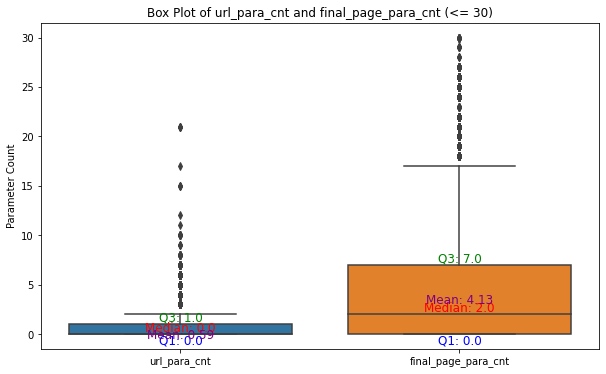

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选出url_para_cnt和final_page_para_cnt小于等于50的数据
filtered_data = df[(df['url_para_cnt'] <= 30) & (df['final_page_para_cnt'] <= 30)]

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制url_para_cnt和final_page_para_cnt的盒图
sns.boxplot(data=filtered_data[['url_para_cnt', 'final_page_para_cnt']])

# 计算中位数、上下四分位数和平均值
medians = filtered_data[['url_para_cnt', 'final_page_para_cnt']].median()
q1 = filtered_data[['url_para_cnt', 'final_page_para_cnt']].quantile(0.25)
q3 = filtered_data[['url_para_cnt', 'final_page_para_cnt']].quantile(0.75)
means = filtered_data[['url_para_cnt', 'final_page_para_cnt']].mean()
print(medians)
print(means)

# 添加标记
plt.text(0, medians[0], f"Median: {medians[0]}", ha='center', va='bottom', color='red', fontsize=12)
plt.text(1, medians[1], f"Median: {medians[1]}", ha='center', va='bottom', color='red', fontsize=12)

plt.text(0, q1[0], f"Q1: {q1[0]}", ha='center', va='top', color='blue', fontsize=12)
plt.text(1, q1[1], f"Q1: {q1[1]}", ha='center', va='top', color='blue', fontsize=12)

plt.text(0, q3[0], f"Q3: {q3[0]}", ha='center', va='bottom', color='green', fontsize=12)
plt.text(1, q3[1], f"Q3: {q3[1]}", ha='center', va='bottom', color='green', fontsize=12)

plt.text(0, means[0], f"Mean: {means[0]:.2f}", ha='center', va='top', color='purple', fontsize=12)
plt.text(1, means[1], f"Mean: {means[1]:.2f}", ha='center', va='top', color='purple', fontsize=12)

# 设置标题和轴标签
plt.title('Box Plot of url_para_cnt and final_page_para_cnt (<= 30)')
plt.ylabel('Parameter Count')

# 显示图表
plt.show()
